In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [ ]:
race = fastf1.get_session(2023, "Singapore", 'R')
race.load()

# For races with mixed conditions, pick_wo_box() is better.
laps = race.laps.pick_quicklaps()

In [ ]:
# We convert the lap time column from timedelta to integer (this is a seaborn-specific modification)
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

In [ ]:
# Order the team from the fastest (lowest median lap time) tp slower
team_order = (transformed_laps[["Team", "LapTime (s)"]].groupby("Team").median()["LapTime (s)"].sort_values().index)

In [ ]:
# Make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

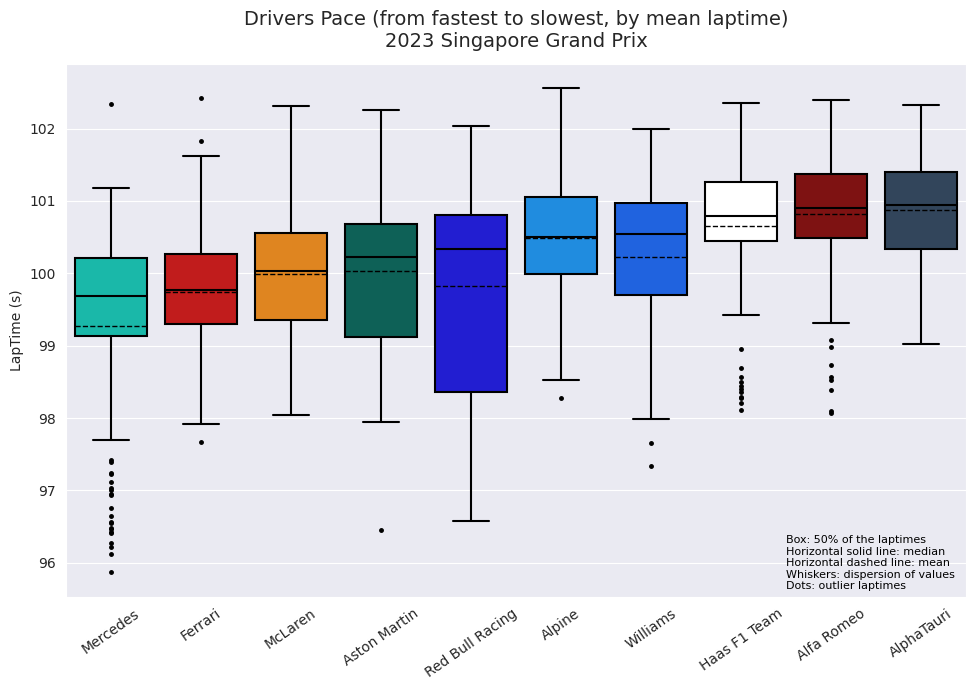

In [ ]:
# Scatter boxplot
fig, ax = plt.subplots(figsize=(10, 7))
plt.title(f"Teams Pace (from fastest to slowest, by mean laptime)\n"
          f"{race.event.year} {race.event['EventName']}", size=14)
sns.set_style('ticks')

sns.boxplot(data=transformed_laps, x="Team", y="LapTime (s)", showmeans=True, meanline=True, meanprops={'color': 'black'},
            order=team_order, palette=team_palette,
            whiskerprops=dict(color="black"),
            boxprops=dict(edgecolor="black"),
            medianprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops={"marker": ".", "markerfacecolor": "black", "markeredgecolor": "black"})

plt.text(0.80, 0.01, "Box: 50% of the laptimes\n"
                    "Horizontal solid line: median\n"
                    "Horizontal dashed line: mean\n"
                    "Whiskers: dispersion of values\n"
                    "Dots: outlier laptimes",
                    transform=ax.transAxes, fontsize=8, color='black', ha='left', va='bottom')

sns.set_style('darkgrid')
ax.set(xlabel=None)
plt.xticks(rotation=35, ha='center')
plt.tight_layout()
plt.show()